In [ ]:
%matplotlib inline
from pylab import *
from sci378 import *
from sci378.stats import *

Version:  0.0.37


[<matplotlib.lines.Line2D>]

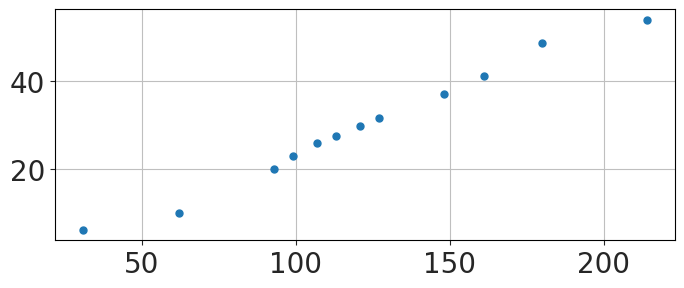

In [ ]:
data=pd.read_csv('data/dog_mass.csv')
t_data=data['days'].values[:12]
y_data=data['mass'].values[:12]

figure(figsize=(8,3))
plot(t_data, y_data, 'o')

In [ ]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.35


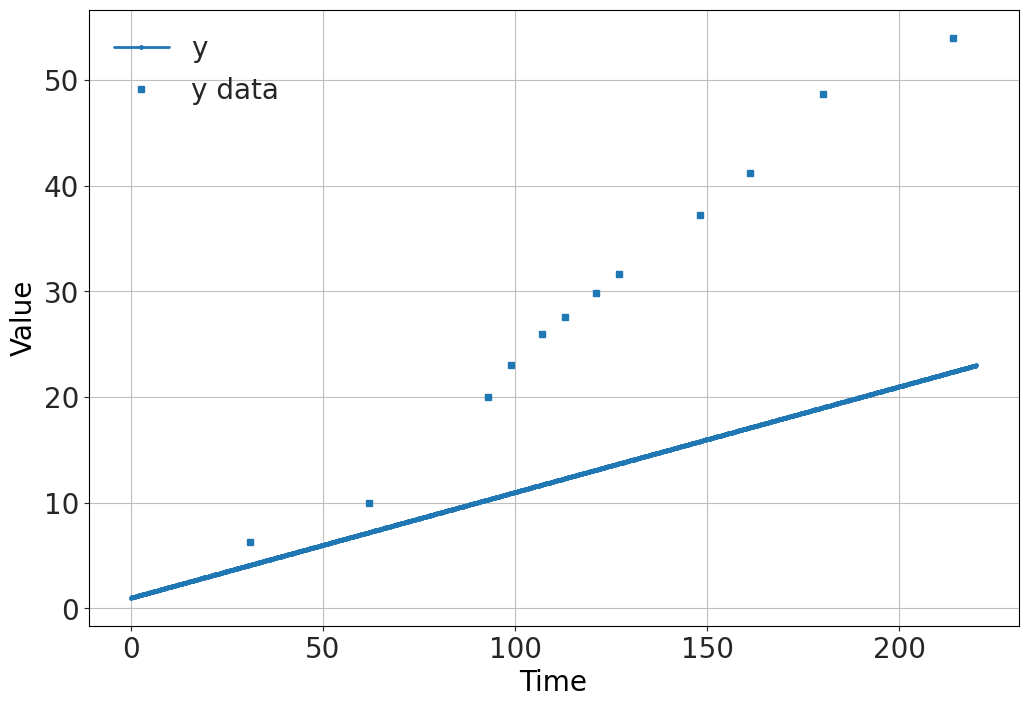

<Figure size 1200x800 with 0 Axes>

In [ ]:
# "y=mx+b"
b=1
sim=Simulation()
sim.add("y'=m",initial_value=b,plot=True)
sim.params(m=0.1)
sim.add_data(t=t_data,y=y_data,plot=True)
sim.run(220)

In [ ]:
def logprior(m,initial_y,σ):
    value=0. 
    
    value+=logNormal(m,0,10)
    value+=logNormal(initial_y,0,10)
    value+=logJeffreys(σ)
    
    return value

def loglikelihood(sim,m,initial_y,σ):
    # pyndamics already has the data in the Simulation object
    err=sim.err(m=m,initial_y=initial_y)
    return logNormal(err,0,σ)


Sampling Prior...
Done.
0.40 s
Running MCMC 1/3...
Done.
9.68 s
Running MCMC 2/3...
Done.
10.10 s
Running MCMC 3/3...
Done.
9.92 s
Copying best estimates to simulation...done.


<Figure size 1200x800 with 0 Axes>

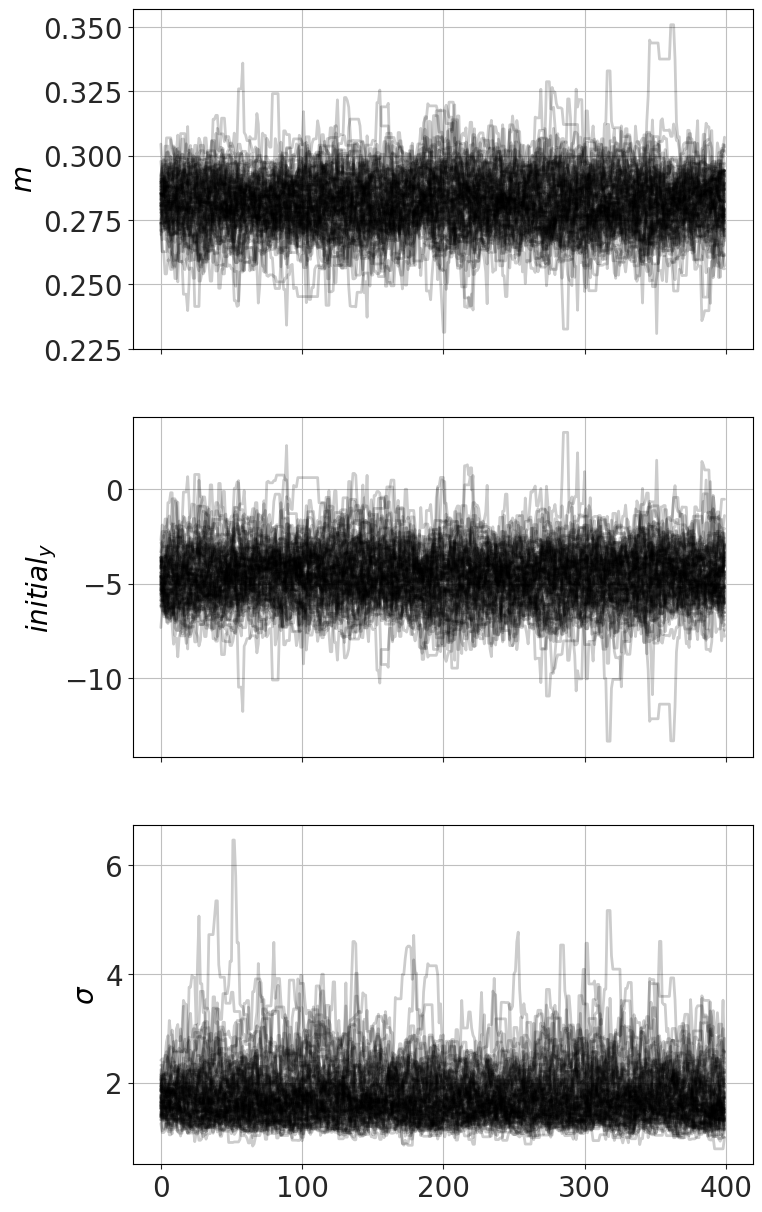

In [ ]:
model=MCMCModel(sim,loglikelihood,logprior)
model.run_mcmc(400,repeat=3,verbose=True)
model.plot_chains()

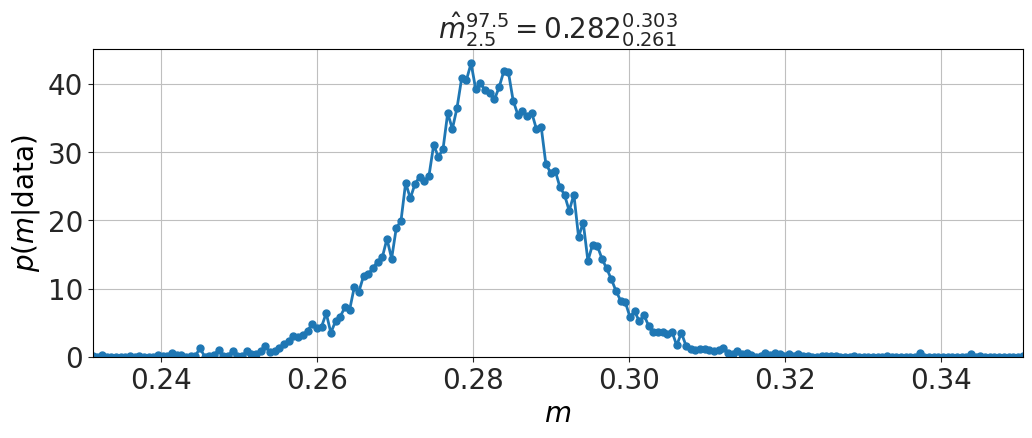

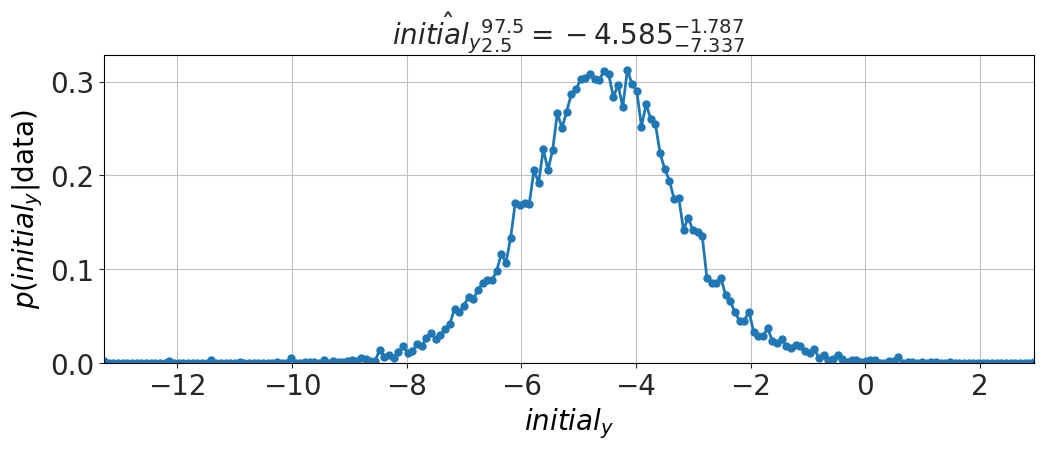

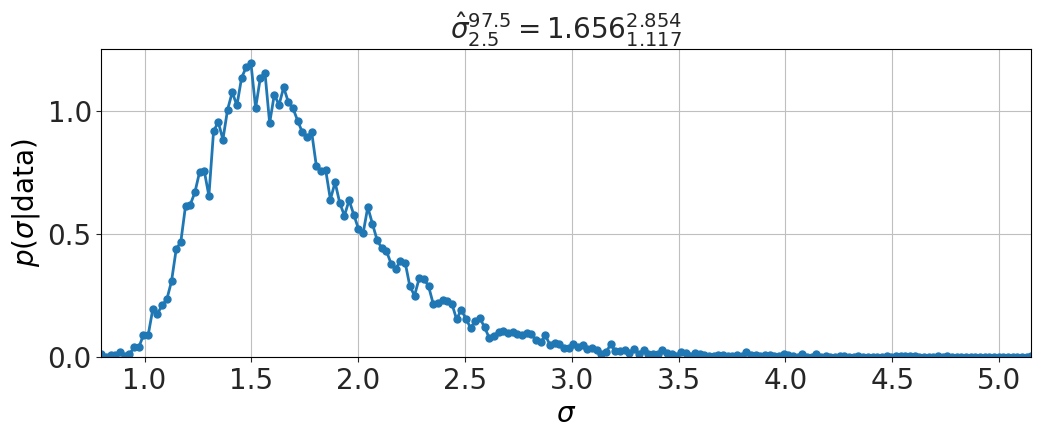

In [ ]:
model.plot_distributions()

In [ ]:
plot??

Signature:
plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield i

[<matplotlib.lines.Line2D>]

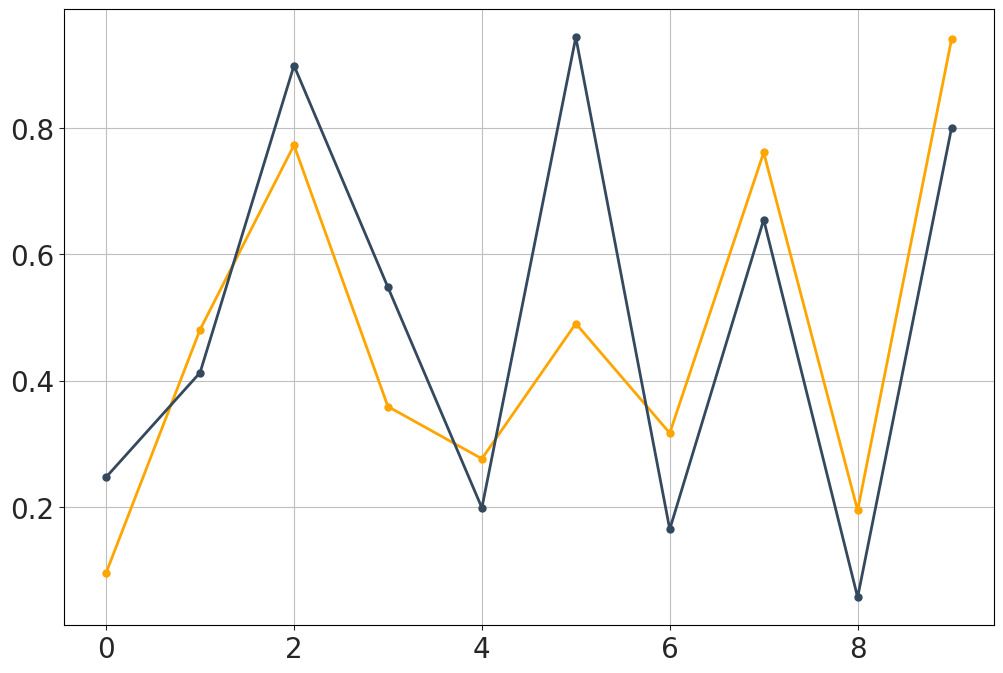

In [ ]:
plot(rand(10),'-o',color='orange')
plot(rand(10),'-o',color='#34495e')